# Logistic Regression
 - Logistic Regression is widely used to predict binary outcomes
for a given set of independent variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['class'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


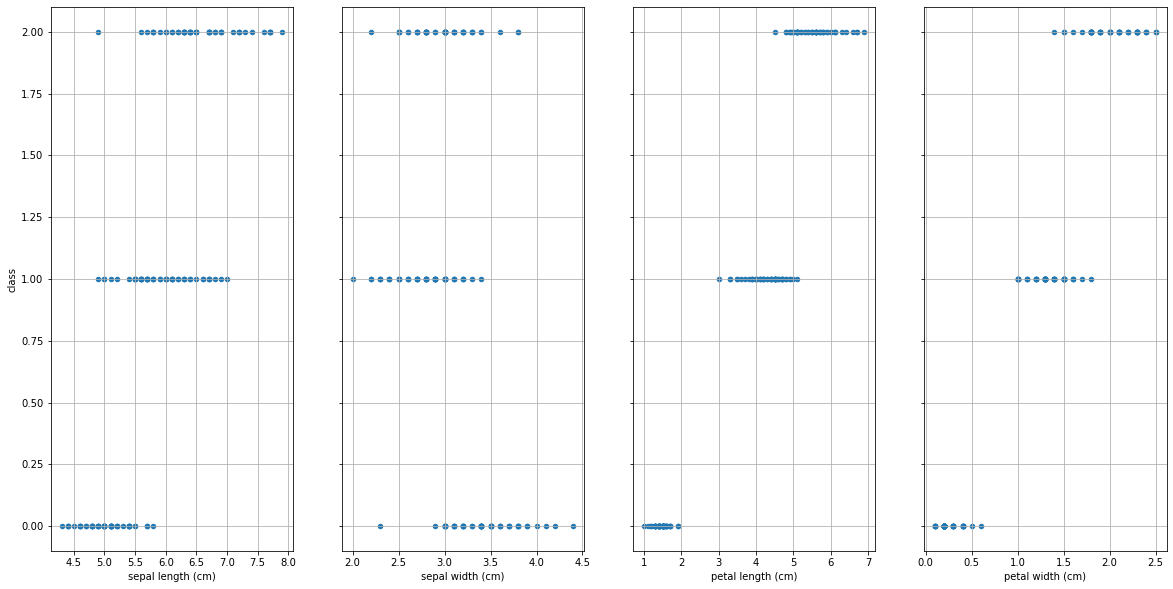

In [6]:
fig, axs = plt.subplots(1,4, sharey = True)
for index , col in enumerate(iris_df):
    if col == 'class': break;
    
    iris_df.plot(kind = 'scatter', x = col, y  = 'class', ax = axs[index], figsize = (20, 10), grid = True)

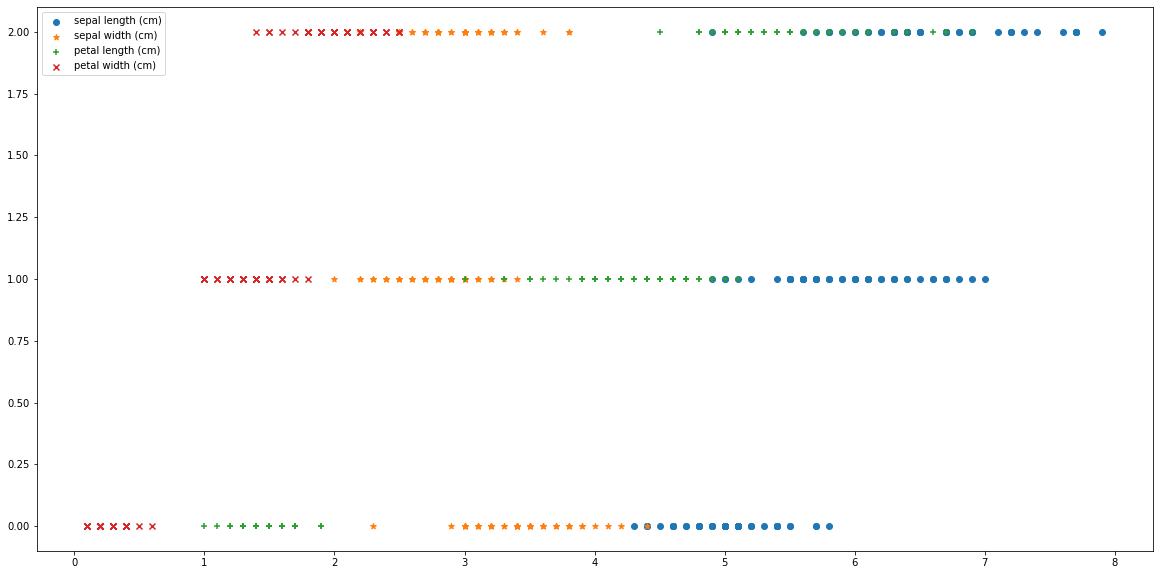

In [7]:
plt.figure(figsize = (20, 10))
plt.scatter(x = iris_df['sepal length (cm)'], y = iris_df['class'], marker = 'o')
plt.scatter(x = iris_df['sepal width (cm)'], y = iris_df['class'], marker = '*')
plt.scatter(x = iris_df['petal length (cm)'], y = iris_df['class'], marker = '+')
plt.scatter(x = iris_df['petal width (cm)'], y = iris_df['class'], marker = 'x')
plt.legend(iris_df.columns)
plt.plot();

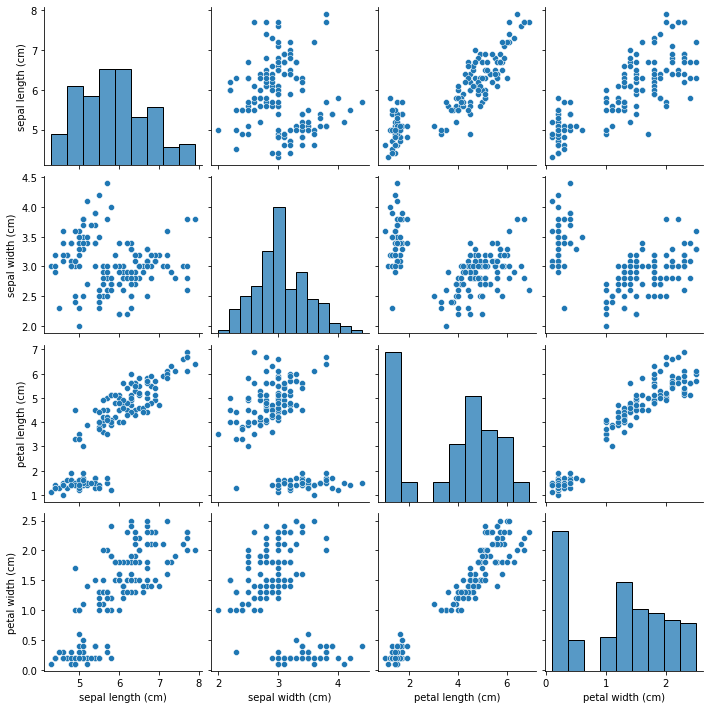

In [8]:
sns.pairplot(iris_df[iris.feature_names])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data[:, [2,3]], iris.target, random_state = 42, test_size = 0.25)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [11]:
from sklearn.preprocessing import StandardScaler
StandardScaler().get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

LogisticRegression()

In [15]:
logPred = logReg.predict(X_test)
logPred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [16]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

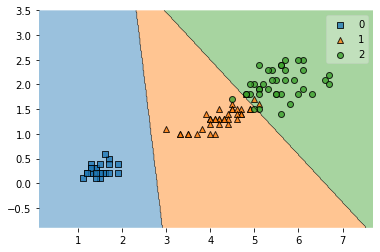

In [17]:
plot_decision_regions(X_train, Y_train, logReg)

<AxesSubplot:>

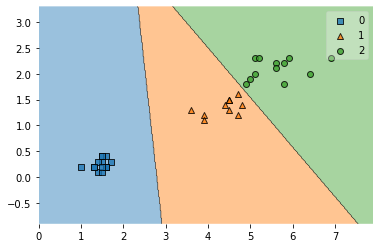

In [18]:
plot_decision_regions(X_test, logPred, logReg)